<img src="escuela-de-economia.png" width="260" height="60">
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Profesor:  Randall Romero Aguilar, PhD</b>
<br><br>
<b>Laboratorio:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Tema 1: Introducción a series de tiempo</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Calculando autocorrelogramas </div>
    
</center>
<i>Creado:     2020-Mar-05 
<br>
Actualizado: 2020-Ago-25</i>



Ejemplo numérico para ilustrar las pruebas de Box-Pierce y Ljung-Box.


Este cuaderno genera figuras que están incluidas en **Handout-01--Introduccion.pdf**

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats.distributions import chi2

## EJEMPLO 1> Crecimiento del IMAE de Costa Rica, serie tendencia-ciclo

¿Es es crecimiento mensual del IMAE tendencia-ciclo un proceso ruido blanco?

In [2]:
log_imae = pd.read_csv('data/log_imae.csv')
log_imae.index = pd.period_range(start='1991-01', freq='M', periods=log_imae.shape[0])

In [3]:
growth = log_imae['Tendencia-ciclo'].diff().dropna()
T = growth.size  # número de datos
M = 7   # máximo número de rezagos
rezagos = np.arange(1, M+1)
alpha = 0.05  # significancia de los test

Calculamos las autocovarianzas, a partir de un rezago

In [4]:
rho = sm.tsa.acf(growth, fft=True, nlags=M)[1:] 

Calculamos el estadístico de Box-Pierce, para todos los rezagos desde el 1 hasta el 7

\begin{equation}
Q^{*} = T\sum_{j=1}^{m}\hat{\rho}_j^2 \; \overset{\text{asy}}{\sim} \; \chi^2_{m-k}
\end{equation}

In [5]:
Qstar = T * (rho ** 2).cumsum()

Calculamos el estadístico de Ljung-Box

\begin{equation}
Q = T(T+2)\sum_{j=1}^{m}\frac{\hat{\rho}_j^2}{T-j} \; \overset{\text{asy}}{\sim} \; \chi^2_{m-k}
\end{equation}

In [6]:
Q = T * (T+2) * ((rho ** 2)/(T-rezagos)).cumsum()

Calculamos los valores críticos, tomando en cuenta que $k=0$ porque los datos que estamos usando no son residuos

In [7]:
vcrits = np.array([chi2(k).ppf(1-alpha) for k in rezagos])

Con carácter informativo nada más, calculamos la autocorrelación parcial

In [8]:
rhop = sm.tsa.pacf(growth, nlags=M, method='ols')[1:]

Juntamos todos los resultados en una tabla de resumen.

In [9]:
resumen = pd.DataFrame({'AC':rho, 'PAC': rhop, 'Box-Pierce':Qstar, 'Ljung-Box':Q, f'$\chi^2(m-k)$': vcrits}, index=rezagos)
resumen.index.name = 'Rezagos'

resumen.round(3)

,AC,PAC,Box-Pierce,Ljung-Box,$\chi^2(m-k)$
Rezagos,,,,,
1,0.874,0.874,264.890,267.187,3.841
2,0.648,-0.490,410.499,414.484,5.991
3,0.493,0.428,494.871,500.082,7.815
4,0.402,-0.273,550.881,557.072,9.488
5,0.353,0.365,594.074,601.149,11.070
6,0.338,-0.213,633.676,641.680,12.592
7,0.331,0.255,671.693,680.704,14.067


Graficamos los datos y el autocorrelograma

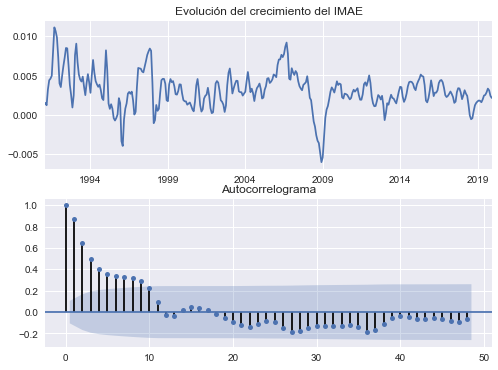

In [10]:
fig, axs = plt.subplots(2,1, figsize=[8,6])
growth.plot(ax=axs[0], title='Evolución del crecimiento del IMAE')
sm.graphics.tsa.plot_acf(growth, ax=axs[1], lags=48, alpha=0.05, title='Autocorrelograma');

## EJEMPLO 2> Crecimiento del tipo de cambio Euro/USD

¿Es es crecimiento diario del tipo de cambio euro-dólar un proceso ruido blanco?

In [11]:
euro = pd.read_csv('data/euro.csv')
#euro.index = pd.to_datetime(euro['fecha'])
euro.drop('fecha',inplace=True,axis=1)

In [12]:
depreciacion = euro.diff().dropna()
T = depreciacion.shape[0]  # número de datos
M = 7   # máximo número de rezagos
rezagos = np.arange(1, M+1)
alpha = 0.05  # significancia de los test

Calculamos las autocovarianzas, a partir de un rezago

In [13]:
rho = sm.tsa.acf(depreciacion, fft=True, nlags=M)[1:] 

Calculamos el estadístico de Box-Pierce, para todos los rezagos desde el 1 hasta el 7

\begin{equation}
Q^{*} = T\sum_{j=1}^{m}\hat{\rho}_j^2 \; \overset{\text{asy}}{\sim} \; \chi^2_{m-k}
\end{equation}

In [14]:
Qstar = T * (rho ** 2).cumsum()

Calculamos el estadístico de Ljung-Box

\begin{equation}
Q = T(T+2)\sum_{j=1}^{m}\frac{\hat{\rho}_j^2}{T-j} \; \overset{\text{asy}}{\sim} \; \chi^2_{m-k}
\end{equation}

In [15]:
Q = T * (T+2) * ((rho ** 2)/(T-rezagos)).cumsum()

Calculamos los valores críticos, tomando en cuenta que $k=0$ porque los datos que estamos usando no son residuos

In [16]:
vcrits = np.array([chi2(k).ppf(1-alpha) for k in rezagos])

Con carácter informativo nada más, calculamos la autocorrelación parcial

In [17]:
rhop = sm.tsa.pacf(depreciacion, nlags=M, method='ols')[1:]

Juntamos todos los resultados en una tabla de resumen.

In [18]:
depreciacion.shape

(5475, 1)

In [19]:
resumen = pd.DataFrame({'AC':rho, 'PAC': rhop, 'Box-Pierce':Qstar, 'Ljung-Box':Q, f'$\chi^2(m-k)$': vcrits}, index=rezagos)
resumen.index.name = 'Rezagos'

resumen.round(4)

,AC,PAC,Box-Pierce,Ljung-Box,$\chi^2(m-k)$
Rezagos,,,,,
1,0.0042,0.0042,0.0948,0.0949,3.8415
2,-0.0063,-0.0064,0.3144,0.3146,5.9915
3,0.0001,0.0002,0.3145,0.3147,7.8147
4,0.0082,0.0082,0.6825,0.6831,9.4877
5,0.0022,0.0021,0.7082,0.7088,11.0705
6,-0.0076,-0.0076,1.0282,1.0293,12.5916
7,0.0106,0.0108,1.6485,1.6507,14.0671


Graficamos los datos y el autocorrelograma

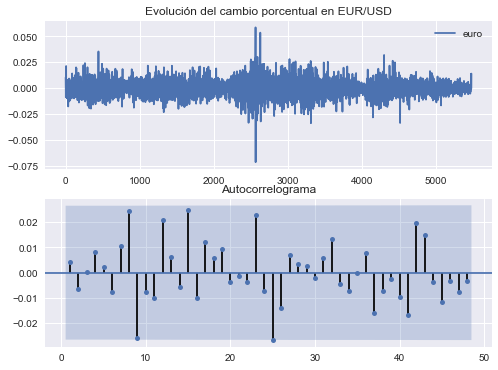

In [20]:
fig, axs = plt.subplots(2,1, figsize=[8,6])
depreciacion.plot(ax=axs[0], title='Evolución del cambio porcentual en EUR/USD')
sm.graphics.tsa.plot_acf(depreciacion, zero=False, ax=axs[1], lags=48, alpha=0.05, title='Autocorrelograma');